# Churn Modelling 

Seyed Mohammad Amin Taheri Ghahfarokhi - 202193514 - ataherighahf@mun.ca


### The minimum requirements for the project are as follows:
- ✅ Reading data from one or more file/url using pandas.
- ✅ Doing some computations on the data using Numpy, Scipy functions and at least one more Python package such as Scikit-learn, openCV, so on.
- ✅ The processed data must be written in HD5 and CSV (or excel) files.
    - ✅ CSV
    - ✅ HD5
- ✅ Visualizing the data using Matplotlib and at least one more visualization tool like Bokeh. Each visualization must have title, labels, and annotations.
- ⬜ Creating at least four classes with all required operations (classes must be instantiated and used for data computations/access). The new classes and functions should be saved in a py file and imported to the main code.
- ✅ You must create a Github repository for the codes and 
    - ✅ project report.

In [51]:
import pandas as pd # File IO and data management
import numpy as np
import matplotlib.pyplot as plt # Main data visualization library
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns # Using Seaborn to plot the data as alternative data visualization library
sns.set_theme()
sns.set_style('whitegrid')


In [52]:
# Set displayed max rows and columns for pandas to display dataframes better
pd.set_option('display.max_columns', None)
pd.reset_option('max_columns')


# Dataset Presentation

## Attribute Information:

| Column | Description |
| :---: | :---: |
|**RowNumberRow** | Numbers from 1 to 10000 |
|**CustomerId** | Unique Ids for bank customer identification|
|**Surname** | Customer's last name|
|**CreditScore** | Credit score of the customer|
|**Geography** | The country from which the customer belongs|
|**Gender** | Male or Female|
|**Age**  | Age of the customer|
|**Tenure** | Number of years for which the customer has been with the bank|
|**Balance** | Bank balance of the customer|
|**NumOfProducts** | Number of bank products the customer is utilising|
|**HasCrCard** | Binary Flag for whether the customer holds a credit card with the bank or not|
|**IsActiveMember** | Binary Flag for whether the customer is an active member with the bank or not|
|**EstimatedSalary** | Estimated salary of the customer in Dollars|


**Output variable (based on sensory data):**
| Column | Description |
| :---: | :---: |
|**Exited** | Binary flag 1 if the customer closed account with bank and 0 if the customer is retained|


- ✅ Generation of attribute’s descriptors for all variables.
- ✅ Table for attribute info
- ✅ plots to hint data distribution
- ✅ missing values & outliers? 
- ✅ delete the outliers



In [53]:
df = pd.read_csv("Churn_Modelling.csv")


In [54]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Discussing histograms
Histograms will tell us the distribution for each attribute and will give us hints to how to normalize and scale each attribute. Some of the attributes has to some extent normal distribution. Like **Credit Score** and **Age**. Other attributes follow a uniform distribution and some of them don't follow a known distribution. 


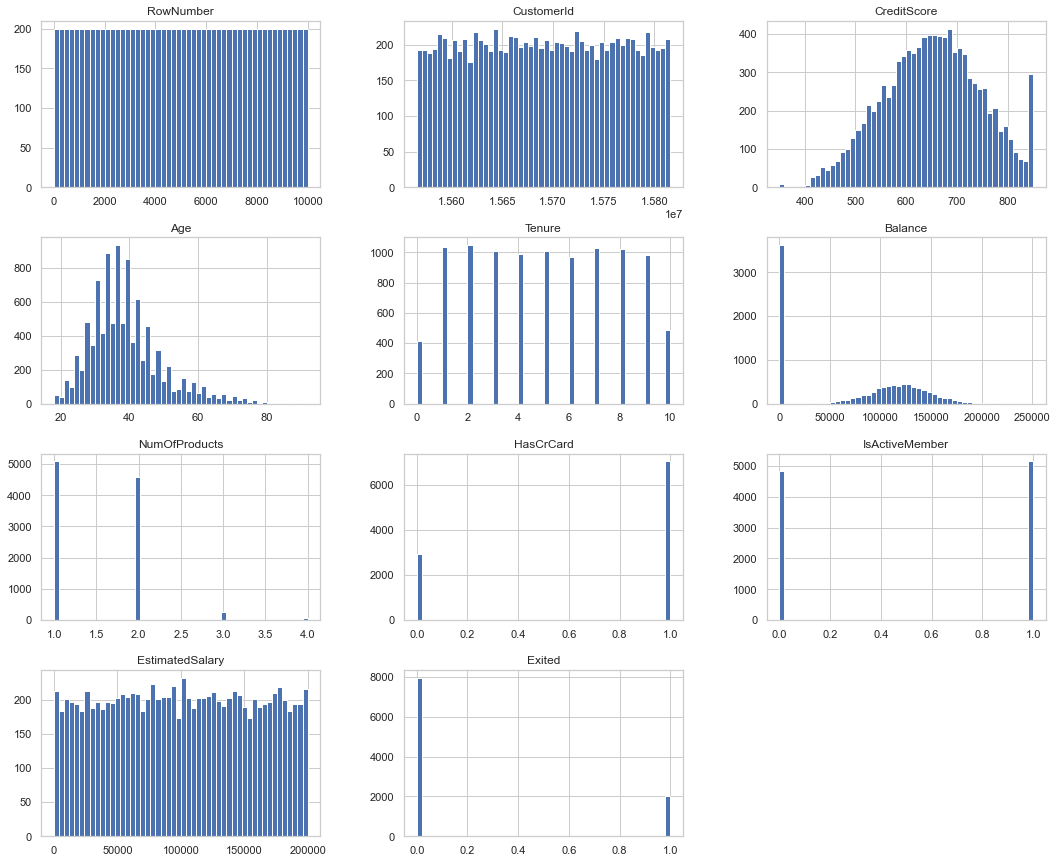

In [55]:
# plot distribution of all features
df.hist(bins=50, figsize=(18, 15))
plt.show()


### Attributes distributions (Violin plot using Seaborn)

As you see above some attributes contribute to the classification as they have different distributions for different classes. But some other don't have a significant difference. Violin plots are used to visualize data distributions, displaying the range, median, and distribution of the data using **seaborn** violin plot library. 

In [56]:
def draw_multivalent_plot(dataset, rows, cols, plot_type):
    column_names = ['CreditScore',
                    'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                    'IsActiveMember', 'EstimatedSalary', 'Exited']

    number_of_column = len(column_names)
    fig, axes = plt.subplots(rows, cols, figsize=(20, 16))

    counter = 0
    for i in range(rows):
        for j in range(cols):
            if 'violin' in plot_type:
                sns.violinplot(
                    x='Exited', y=column_names[counter], data=dataset, ax=axes[i][j])
            elif 'box' in plot_type:
                sns.boxplot(
                    x='Exited', y=column_names[counter], data=dataset, ax=axes[i][j])
            elif 'point' in plot_type:
                sns.pointplot(
                    x='Exited', y=column_names[counter], data=dataset, ax=axes[i][j])
            elif 'bar' in plot_type:
                sns.barplot(
                    x='Exited', y=column_names[counter], data=dataset, ax=axes[i][j])

            counter += 1
            if counter == (number_of_column-1,):
                break


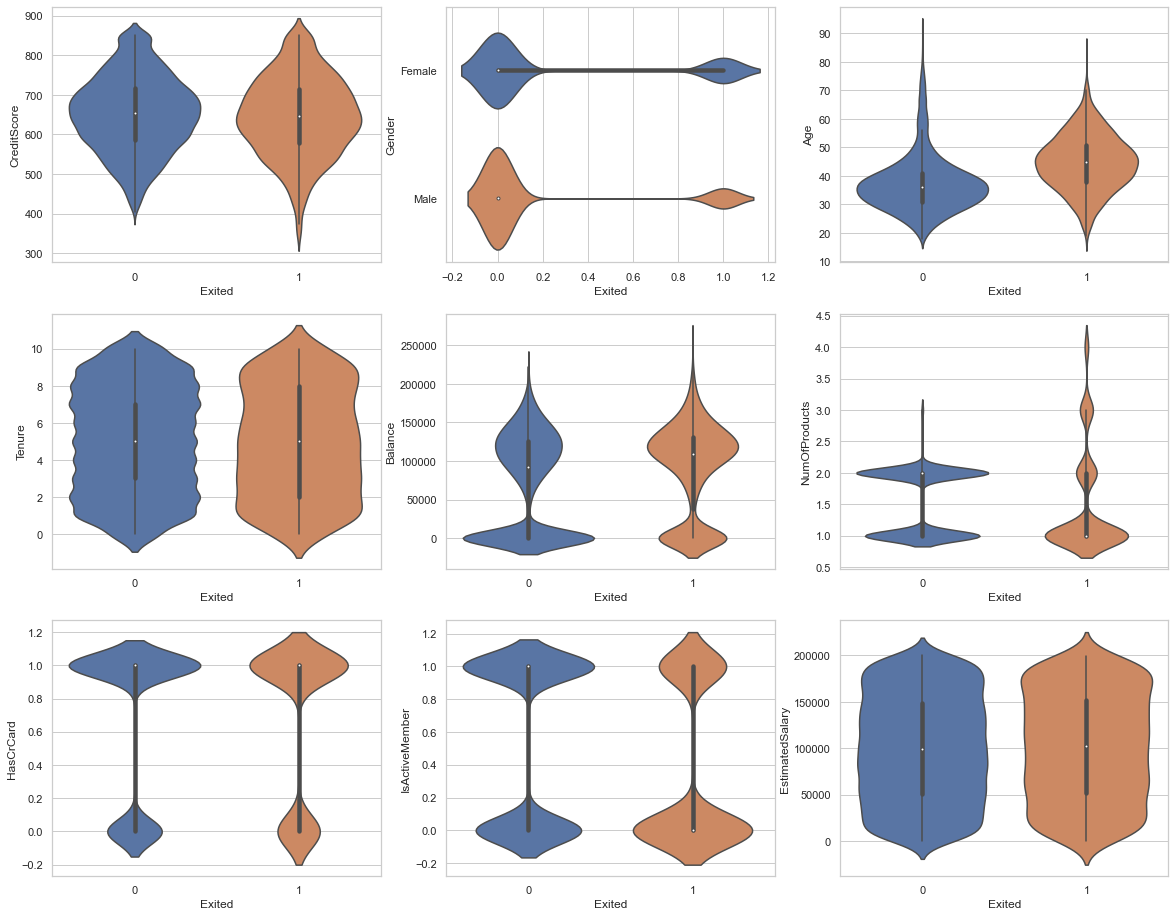

In [57]:
draw_multivalent_plot(df, 3, 3, 'violin')


In [58]:
# transform Gender column to binary
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})

# transform geography column to ordinal encoding
df["Geography"] = df["Geography"].map({'France': 0, 'Spain': 1, 'Germany': 2})


In [59]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,1,1,43,2,125510.82,1,1,1,79084.10,0


#### Dropping unnecessary columns for classification

In [60]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)


In [61]:
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


### Detecting and Deleting outliers

In [62]:
dim1, dim2 = df.shape
print(dim1, dim2)
# Delete outliers based on feature values for all rows and features with IQR if it's bigger than 2 times of the IQR.
for i in range(len(df.columns) - 1):
    q1, q3 = np.percentile(df.iloc[:, i], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    df.drop(df[df.iloc[:, i] < lower_bound].index, inplace=True)
    df.drop(df[df.iloc[:, i] > upper_bound].index, inplace=True)


10000 11


In [63]:
print("Number of deleted data for outliers", dim1 - df.shape[0])


Number of deleted data for outliers 432


# Data scaling

- ✅ plot side by side 



**RobustScaler**: It uses median to replace the zero values in the dataframe. Robust Scaler is used to scale the data to a given range. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution. You can see in the plots that the data distribution is not changed.


In [64]:
x = df[df.columns[:-1]]
y = df[df.columns[-1]]


In [65]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

val_cols_names = df.columns[:-1]
val_cols_names = list(val_cols_names)


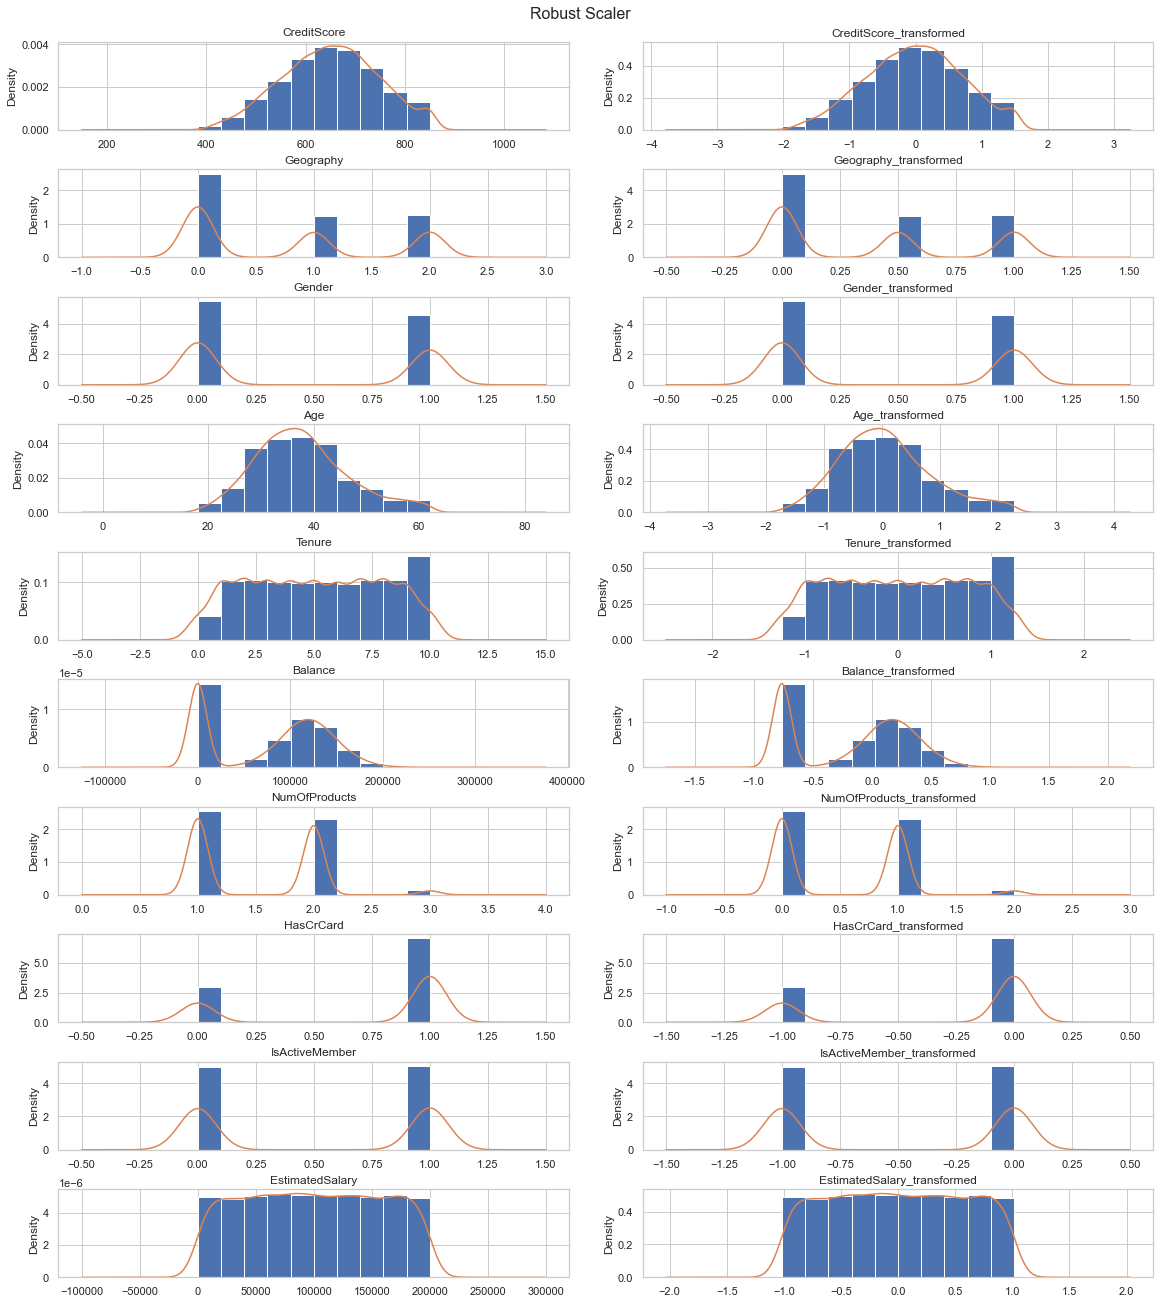

In [66]:
def plot(x, columns, df_transformed, fig_title):
    fig, axs = plt.subplots(len(columns), 2, figsize=(
        16, 18), constrained_layout=True)
    fig.suptitle(fig_title, fontsize=16)
    axs = axs.flatten()
    i = 0
    for c in columns:
        x[c].hist(ax=axs[i], density=True)  # normalizes the density
        x[c].plot.density(ax=axs[i], title=c)
        df_transformed[c].hist(ax=axs[i+1], density=True,
                               stacked=True)  # normalizes the density
        df_transformed[c].plot.density(
            ax=axs[i+1], title=str(c+'_transformed'))
        i += 2


robust_scaler = RobustScaler()
df2 = robust_scaler.fit_transform(x)
robust_scaler_df = pd.DataFrame(df2, index=x.index, columns=x.columns)

plot(x, val_cols_names, robust_scaler_df, 'Robust Scaler')


In [68]:
# write the transformed data to a csv file
robust_scaler_df.to_csv('robust_scaler_df.csv')

# write the transformed file into a hdf5 file
robust_scaler_df.to_hdf('robust_scaler_df.h5', key='df')

## Clustering with scipy k_means
We want to see if we can cluster the two group without having access to the labels

In [69]:
# cluster the data based on the feature values
from sklearn.metrics import accuracy_score
from scipy.cluster.vq import kmeans, vq
df_cluster = robust_scaler_df.copy()  # copy the dataframe
results, _ = kmeans(df_cluster.values, 2)
codes, _ = vq(df_cluster.values, results)

# add the cluster column to the dataframe
codes = pd.DataFrame(codes, columns=['Cluster'])
df_cluster = df_cluster.join(codes)
df_cluster = df_cluster.join(df['Exited'])

# Drop the rows that contain nan values
df_cluster.dropna(inplace=True)

y_hat = df_cluster['Cluster']
y = df_cluster['Exited']

# accuracy of the model
print("Accuracy of the clustering: ", accuracy_score(y_hat, y))


Accuracy of the clustering:  0.4871094603452043


# Classification using Gradient Boosting Classifier


In [70]:
X = robust_scaler_df
y = df["Exited"].reset_index(drop=True)


In [71]:
# import boosting models
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

gb_cv = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
# grid search for the best parameters
param_grid = {'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 5, 10],
                'max_features': [1.0, 0.3, 0.1]}
grid = GridSearchCV(gb_cv, param_grid, cv=5)    
grid.fit(X, y)

# print the best parameters
print("Best parameters: ", grid.best_params_)


Best parameters:  {'max_depth': 5, 'max_features': 0.3, 'min_samples_leaf': 5}


In [72]:
Best_params = {'max_depth': 5, 'max_features': 0.3, 'min_samples_leaf': 5}
gb_cv = GradientBoostingClassifier(**Best_params)
results = cross_val_score(gb_cv, X, y, cv=5)
print("Accuracy of Gradient Boosting Classifier: ", results.mean())


Accuracy of Gradient Boosting Classifier:  0.8619356315284359


# Acknowledgements
I wanted to thank Dr. Ebrahim Karami for the great semester. I learned a lot of different technologies through this course and had a great time. :))

Sincerely,

Amin